## Assignment 2
## Student Name : Justin Joseph
## Student Id : 8786567

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

df = pd.read_csv('heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [78]:
df.shape

(918, 12)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Removing duplicates and null values

In [80]:
df.isnull().values.any()
df.drop_duplicates(inplace=True)

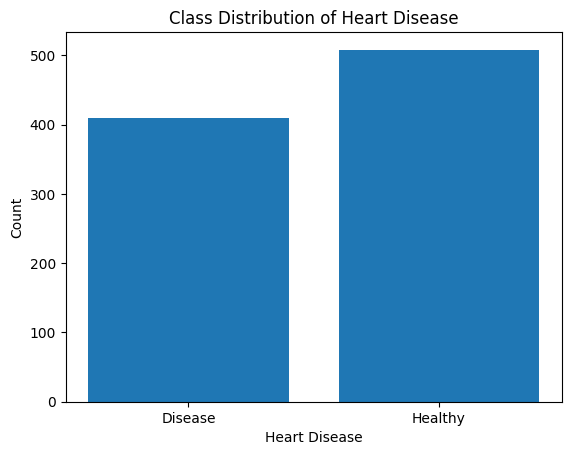

In [81]:

class_counts = df['HeartDisease'].value_counts()

# Plotting the bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Class Distribution of Heart Disease')
plt.xticks(class_counts.index, labels=['Healthy', 'Disease'])
plt.show()


In [82]:
# Convert relevant columns to numeric types
numericCols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numericCols] = df[numericCols].apply(pd.to_numeric)

# Removing outliers using Z-score
zScores = np.abs(stats.zscore(df[numericCols]))
dfNoOutliers = df[(zScores < 3).all(axis=1)]

# Convert text columns to numbers using label encoding and one-hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encoding for binary categorical columns
binaryCols = ['Sex', 'FastingBS', 'ExerciseAngina']
labelEncoder = LabelEncoder()
for col in binaryCols:
    dfNoOutliers[col] = labelEncoder.fit_transform(dfNoOutliers[col])

# Encoding for non-binary categorical columns
categoricalCols = ['ChestPainType', 'RestingECG', 'ST_Slope']
dfNoOutliers = pd.get_dummies(dfNoOutliers, columns=categoricalCols)

# Apply scaling to the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfNoOutliers[numericCols] = scaler.fit_transform(dfNoOutliers[numericCols])


/tmp/ipykernel_4516/646338361.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNoOutliers[col] = labelEncoder.fit_transform(dfNoOutliers[col])


In [83]:
# Assuming 'HeartDisease' is the target column
X = dfNoOutliers.drop('HeartDisease', axis=1)
y = dfNoOutliers['HeartDisease']

# Split the data into training and testing sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM standalone model
svmModel = SVC(kernel='linear')
svmModel.fit(XTrain, yTrain)
svmPredictions = svmModel.predict(XTest)
svmAccuracy = accuracy_score(yTest, svmPredictions)
print(f"SVM Standalone Model Accuracy: {svmAccuracy:.2f}")

# Decision Tree standalone model
dtModel = DecisionTreeClassifier(random_state=42)
dtModel.fit(XTrain, yTrain)
dtPredictions = dtModel.predict(XTest)
dtAccuracy = accuracy_score(yTest, dtPredictions)
print(f"Decision Tree Standalone Model Accuracy: {dtAccuracy:.2f}")



SVM Standalone Model Accuracy: 0.89
Decision Tree Standalone Model Accuracy: 0.79


In [84]:
from sklearn.ensemble import BaggingClassifier

# SVM Bagging model
svmBaggingModel = BaggingClassifier(base_estimator=SVC(kernel='linear'), random_state=42)
svmBaggingModel.fit(XTrain, yTrain)
svmBaggingPredictions = svmBaggingModel.predict(XTest)
svmBaggingAccuracy = accuracy_score(yTest, svmBaggingPredictions)
print(f"SVM Bagging Model Accuracy: {svmBaggingAccuracy:.2f}")

# Decision Tree Bagging model
dtBaggingModel = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)
dtBaggingModel.fit(XTrain, yTrain)
dtBaggingPredictions = dtBaggingModel.predict(XTest)
dtBaggingAccuracy = accuracy_score(yTest, dtBaggingPredictions)
print(f"Decision Tree Bagging Model Accuracy: {dtBaggingAccuracy:.2f}")



/home/justin/anaconda3/envs/Py310/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SVM Bagging Model Accuracy: 0.89
Decision Tree Bagging Model Accuracy: 0.88


/home/justin/anaconda3/envs/Py310/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [85]:
# Evaluation metrics
def printMetrics(yTrue, yPred, modelName):
    accuracy = accuracy_score(yTrue, yPred)
    precision = precision_score(yTrue, yPred)
    recall = recall_score(yTrue, yPred)
    f1 = f1_score(yTrue, yPred)
    aucRoc = roc_auc_score(yTrue, yPred)
    confMatrix = confusion_matrix(yTrue, yPred)
    
    print(f"{modelName} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"AUC-ROC: {aucRoc:.2f}")
    print("Confusion Matrix:")
    print(confMatrix)
    print("\n")

# Print metrics for standalone models
printMetrics(yTest, svmPredictions, "SVM Standalone")
printMetrics(yTest, dtPredictions, "Decision Tree Standalone")

# Print metrics for Bagging models
printMetrics(yTest, svmBaggingPredictions, "SVM Bagging")
printMetrics(yTest, dtBaggingPredictions, "Decision Tree Bagging")

SVM Standalone Metrics:
Accuracy: 0.89
Precision: 0.84
Recall: 0.98
F1-Score: 0.90
AUC-ROC: 0.88
Confusion Matrix:
[[68 18]
 [ 2 92]]


Decision Tree Standalone Metrics:
Accuracy: 0.79
Precision: 0.81
Recall: 0.79
F1-Score: 0.80
AUC-ROC: 0.79
Confusion Matrix:
[[69 17]
 [20 74]]


SVM Bagging Metrics:
Accuracy: 0.89
Precision: 0.85
Recall: 0.97
F1-Score: 0.91
AUC-ROC: 0.89
Confusion Matrix:
[[70 16]
 [ 3 91]]


Decision Tree Bagging Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.89
F1-Score: 0.88
AUC-ROC: 0.88
Confusion Matrix:
[[74 12]
 [10 84]]




The SVM Standalone model achieves a high accuracy of 0.89 with good precision (84%) and high recall (98%) for identifying positive instances. The Decision Tree Standalone model shows moderate performance with an accuracy of 0.79, precision of 81%, and recall of 79%. However, Bagging significantly improves both models, with SVM Bagging achieving an accuracy of 0.89, precision of 85%, and recall of 97%, and Decision Tree Bagging achieving an accuracy of 0.88, precision of 88%, and recall of 89%. Overall, Bagging enhances the performance of both models, with the Decision Tree model benefiting the most from this approach.




